<a href="https://colab.research.google.com/github/bhaskarjyotitamuly/Loan-Approval-Prediction-/blob/main/AnalyticsVidhya_Competition_Loan_Prediction_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analytics Vidhya Problem - Loan Prediction

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [153]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,accuracy_score

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [156]:
pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

In [157]:
data = pd.read_csv('/content/gdrive/MyDrive/loan_prediction_practice_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/loan_prediction_practice_test.csv')

### EDA :

In [158]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [160]:
data.shape

(614, 13)

In [161]:
test.shape

(367, 12)

In [162]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [163]:
# Making use of 'Loan_ID' as well as a variable in case it added some value to the predictions. 
'''data['Loan_ID'] = data['Loan_ID'].str.lstrip('LP00')
data['Loan_ID'].head()'''

"data['Loan_ID'] = data['Loan_ID'].str.lstrip('LP00')\ndata['Loan_ID'].head()"

In [164]:
# Loan_ID didn't add any value to the analysis,so these code lines are commented
'''data['Loan_ID'] = data['Loan_ID'].astype(int)'''

"data['Loan_ID'] = data['Loan_ID'].astype(int)"

In [165]:
data.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [166]:
test.isnull().mean()

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [167]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [169]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Checking for imbalance in dependent variable :

In [170]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

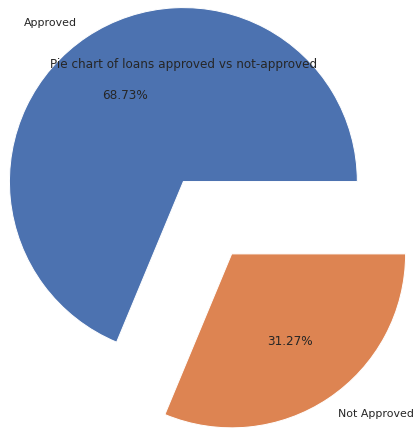

In [171]:
plt.axis('equal')
plt.pie(data['Loan_Status'].value_counts(),labels=['Approved','Not Approved'],autopct='%0.2f%%',radius=2,explode=[0,1.0])
plt.title('Pie chart of loans approved vs not-approved')
plt.show()

#### Thus clearly, there is an imbalance with the loans approved(Yes) comprising of 68.73% of the overall data, and loans not-approved(No) comprising of 31.27% of the overall data.

### Filling missing values for the categorical features :

#### 1) Gender :

In [172]:
data['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

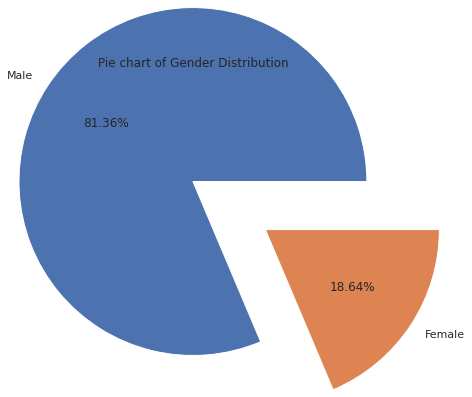

In [173]:
plt.axis('equal')
plt.pie(data['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.2f%%',radius=2,explode=[0,1.0])
plt.title('Pie chart of Gender Distribution')
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


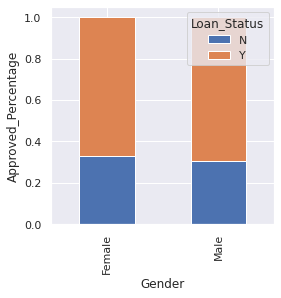

In [174]:
print(pd.crosstab(data["Gender"],data["Loan_Status"]))
Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
print(Gender.div(Gender.sum(1).astype(float),axis=0))
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Approved_Percentage")
plt.show()

#### So the percentages of defaults for both male and female are almost the same. 

In [175]:
# Checking the percentage of defaults for the ones with missing values in 'Gender' column :
data_gender_missing = data[data['Gender'].isnull()]
data_gender_missing['Loan_Status'].value_counts(normalize=True)

Y    0.615385
N    0.384615
Name: Loan_Status, dtype: float64

In [176]:
# Since default percentage of missing valujes is closer to default percentage of Gender 'Female',and also since females are much lesser in numbers, so the missing values are imputed with 'Female'.
data['Gender'] = data['Gender'].fillna('Female')
test['Gender'] = test['Gender'].fillna('Female')

In [177]:
data['Gender'].value_counts(normalize=True)

Male      0.796417
Female    0.203583
Name: Gender, dtype: float64

#### 2) Dependents :

In [178]:
data['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

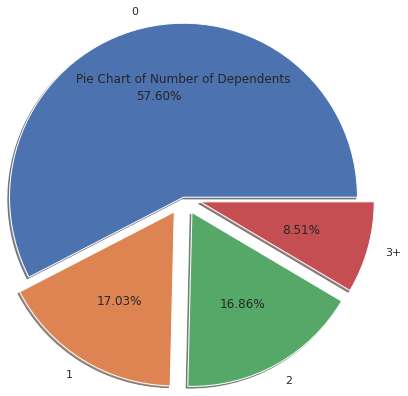

In [179]:
# Checking the distribution of the various values in 'Dependents' feature, in terms of percentage :
plt.axis('equal')
plt.pie(data['Dependents'].value_counts(),labels=['0','1','2','3+'],autopct='%0.2f%%',radius=2,explode=[0,0.2,0.2,0.2],shadow=True)
plt.title('Pie Chart of Number of Dependents')
plt.show()

In [180]:
# Checking the percentage of defaults for each of the classes of 'Dependents' variable :
print(data[data['Dependents']=='0']['Loan_Status'].value_counts(normalize=True))
print(data[data['Dependents']=='1']['Loan_Status'].value_counts(normalize=True))
print(data[data['Dependents']=='2']['Loan_Status'].value_counts(normalize=True))
print(data[data['Dependents']=='3+']['Loan_Status'].value_counts(normalize=True))

Y    0.689855
N    0.310145
Name: Loan_Status, dtype: float64
Y    0.647059
N    0.352941
Name: Loan_Status, dtype: float64
Y    0.752475
N    0.247525
Name: Loan_Status, dtype: float64
Y    0.647059
N    0.352941
Name: Loan_Status, dtype: float64


Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


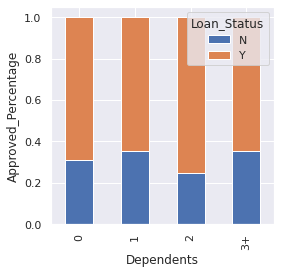

In [181]:
# Plotting the percentage of defaults for each of the classes of 'Dependents' variable :
print(pd.crosstab(data["Dependents"],data["Loan_Status"]))
Dependents = pd.crosstab(data["Dependents"],data["Loan_Status"])
print(Dependents.div(Dependents.sum(1).astype(float),axis=0))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Approved_Percentage")
plt.show()

In [182]:
data_Dependents_missing  = data[data['Dependents'].isnull()] 
data_Dependents_missing['Loan_Status'].value_counts(normalize=True)

Y    0.6
N    0.4
Name: Loan_Status, dtype: float64

In [183]:
# Since the missing Dependent values have highest non-approved loans, so they are imputed with '3+'.
data['Dependents'] = data['Dependents'].fillna('3+')

In [184]:
test['Dependents'] = test['Dependents'].fillna('3+')

#### 3) Married :

In [185]:
# Since only a very few missing values are present only in the train data for feature 'Married', these values are dropped.
data = data.dropna(subset=['Married'])

In [186]:
data['Married'].isnull().mean()

0.0

#### 4) Self_Employed :

In [187]:
data['Self_Employed'].value_counts(normalize=True)

No     0.858377
Yes    0.141623
Name: Self_Employed, dtype: float64

In [188]:
print(data[data['Self_Employed']=='No']['Loan_Status'].value_counts(normalize=True))
print(data[data['Self_Employed']=='Yes']['Loan_Status'].value_counts(normalize=True))

Y    0.684105
N    0.315895
Name: Loan_Status, dtype: float64
Y    0.682927
N    0.317073
Name: Loan_Status, dtype: float64


Loan_Status      N    Y
Self_Employed          
No             157  340
Yes             26   56
Loan_Status           N         Y
Self_Employed                    
No             0.315895  0.684105
Yes            0.317073  0.682927


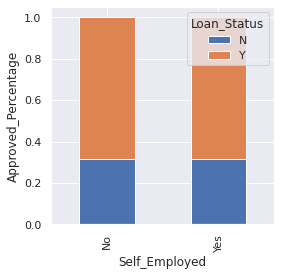

In [189]:
# Plotting the percentage of defaults for each of the classes of 'Dependents' variable :
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))
Dependents = pd.crosstab(data["Self_Employed"],data["Loan_Status"])
print(Dependents.div(Dependents.sum(1).astype(float),axis=0))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Approved_Percentage")
plt.show()

#### The approved and non-approved percentages are almost the same for both the values of 'Self-Employed'.

In [190]:
# Percentage of approvals for missing values in feature 'Self_Employed' :
data_employed_missing = data[data['Self_Employed'].isnull()] 
data_employed_missing['Loan_Status'].value_counts(normalize=True) 

Y    0.71875
N    0.28125
Name: Loan_Status, dtype: float64

In [191]:
# After trying to impute the missing values with both 'Yes' and 'No', better results are obtained with 'No'.
data['Self_Employed'] = data['Self_Employed'].fillna('No')
#data['Self_Employed'] = data['Self_Employed'].fillna('Yes')

In [192]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')
#test['Self_Employed'] = test['Self_Employed'].fillna('Yes')

#### 5) Credit_History :

In [193]:
data['Credit_History'].value_counts(normalize=True) 

1.0    0.841355
0.0    0.158645
Name: Credit_History, dtype: float64

In [194]:
data['Credit_History'] = data['Credit_History'].astype(object)

In [195]:
print(data[data['Credit_History']==1]['Loan_Status'].value_counts(normalize=True))
print(data[data['Credit_History']==0]['Loan_Status'].value_counts(normalize=True))

Y    0.794492
N    0.205508
Name: Loan_Status, dtype: float64
N    0.921348
Y    0.078652
Name: Loan_Status, dtype: float64


In [196]:
data_credit_missing  = data[data['Credit_History'].isnull()]
data_credit_missing['Loan_Status'].value_counts(normalize=True)

Y    0.74
N    0.26
Name: Loan_Status, dtype: float64

In [197]:
# Since percentages of approvals for missing values in feature 'Credit_History' are closer to value 1, so all missing values are imputed with '1'.
data['Credit_History'] = data['Credit_History'].fillna(1)

In [198]:
test['Credit_History'] = test['Credit_History'].fillna(1)

### Coming to the numerical variables, we'll use IterativeImputer in this case :

In [199]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [200]:
data.isnull().mean()

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.034370
Loan_Amount_Term     0.022913
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [201]:
#data = data.dropna(subset=['LoanAmount','Loan_Amount_Term'])

### 6) Loan_Amount_Term :

In [202]:
data['Loan_Amount_Term'].value_counts()

360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [203]:
# Converting 'Loan_Amount_Term' in months to years :
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12
data['Loan_Amount_Term'].value_counts() 

30.0    511
15.0     44
40.0     14
25.0     13
7.0       4
20.0      3
10.0      3
3.0       2
5.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [204]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term']/12
test['Loan_Amount_Term'].value_counts() 

30.000000    311
15.000000     22
40.000000      8
25.000000      7
20.000000      4
7.000000       3
29.166667      1
0.500000       1
10.000000      1
3.000000       1
1.000000       1
5.000000       1
Name: Loan_Amount_Term, dtype: int64

In [205]:
data[data['Loan_Amount_Term'].isnull()]['Loan_Status'].value_counts(normalize=True)

Y    0.571429
N    0.428571
Name: Loan_Status, dtype: float64

In [206]:
Loan_Amount_Term = pd.crosstab(data["Loan_Amount_Term"],data["Loan_Status"])
print(Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float),axis=0))

Loan_Status              N         Y
Loan_Amount_Term                    
1.0               0.000000  1.000000
3.0               1.000000  0.000000
5.0               0.000000  1.000000
7.0               0.250000  0.750000
10.0              0.000000  1.000000
15.0              0.340909  0.659091
20.0              0.333333  0.666667
25.0              0.384615  0.615385
30.0              0.299413  0.700587
40.0              0.642857  0.357143


In [207]:
# Since values less than 10 were very less, these values are converted to 10 :
data.loc[data['Loan_Amount_Term']<=10,'Loan_Amount_Term'] = 10
test.loc[test['Loan_Amount_Term']<=10,'Loan_Amount_Term'] = 10 

In [208]:
data[data['Loan_Amount_Term']<=10].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,10.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,10.0,1.0,Urban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,10.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,10.0,1.0,Semiurban,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,10.0,1.0,Urban,Y


In [209]:
test['Loan_Amount_Term'].value_counts() 

30.000000    311
15.000000     22
40.000000      8
10.000000      8
25.000000      7
20.000000      4
29.166667      1
Name: Loan_Amount_Term, dtype: int64

In [210]:
test[test['Loan_Amount_Term']>29][test['Loan_Amount_Term']<30]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
157,LP001867,Male,Yes,0,Graduate,No,4333,2291,133.0,29.166667,1.0,Rural


In [211]:
test.loc[157,'Loan_Amount_Term'] = 30
test.loc[157,'Loan_Amount_Term']

30.0

In [212]:
data['Loan_Amount_Term'].value_counts() 

30.0    511
15.0     44
40.0     14
25.0     13
10.0     12
20.0      3
Name: Loan_Amount_Term, dtype: int64

In [213]:
test['Loan_Amount_Term'].value_counts() 

30.0    312
15.0     22
40.0      8
10.0      8
25.0      7
20.0      4
Name: Loan_Amount_Term, dtype: int64

In [214]:
print(data['Loan_Amount_Term'].isnull().sum())
print(test['Loan_Amount_Term'].isnull().sum())

14
6


In [215]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(25)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(25)

### Imputing the missing values for all the numerical variables using IterativeImputer :

In [216]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer()
#y = data['Loan_Status']
loan_ids_train = data['Loan_ID']
loan_ids_test = test['Loan_ID']
data_new = data.drop(['Loan_ID'],axis=1)
test_new = test.drop(['Loan_ID'],axis=1)
data_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']] = imp.fit_transform(data_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']])
test_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']] = imp.transform(test_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']])

In [217]:
data_new['Loan_Amount_Term'].value_counts() 

30.0    511
15.0     44
25.0     27
40.0     14
10.0     12
20.0      3
Name: Loan_Amount_Term, dtype: int64

In [218]:
test_new['Loan_Amount_Term'].value_counts() 

30.0    312
15.0     22
25.0     13
40.0      8
10.0      8
20.0      4
Name: Loan_Amount_Term, dtype: int64

In [219]:
data_new.isnull().mean()

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [220]:
test_new.isnull().mean()

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

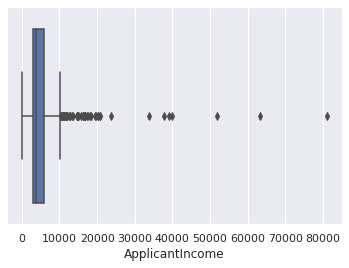

In [221]:
sns.boxplot(data_new['ApplicantIncome'])
plt.show()

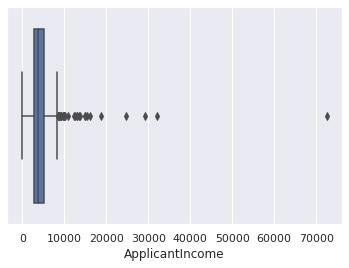

In [222]:
sns.boxplot(test_new['ApplicantIncome'])
plt.show()

### Feature Engineering : Creating new variables for better results 

In [223]:
data_new['Total_Income'] = data_new['ApplicantIncome'] + data_new['CoapplicantIncome']
test_new['Total_Income'] = test_new['ApplicantIncome'] + test_new['CoapplicantIncome']
data_new['Coapplicant_share'] = data_new['CoapplicantIncome']/data_new['Total_Income']
test_new['Coapplicant_share'] = test_new['CoapplicantIncome']/test_new['Total_Income']

In [224]:
data_new['Coapplicant_share'] = data_new['Coapplicant_share']/100
test_new['Coapplicant_share'] = test_new['Coapplicant_share']/100

In [225]:
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Coapplicant_share
0,Male,No,0,Graduate,No,5849.0,0.0,137.983483,30.0,1.0,Urban,Y,5849.0,0.000000
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,30.0,1.0,Rural,N,6091.0,0.002476
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,30.0,1.0,Urban,Y,3000.0,0.000000
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,30.0,1.0,Urban,Y,4941.0,0.004772
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,30.0,1.0,Urban,Y,6000.0,0.000000


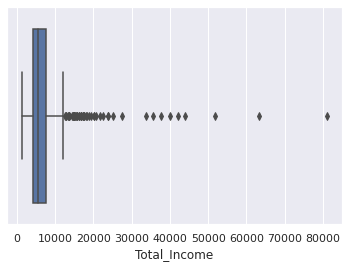

In [226]:
sns.boxplot(data_new['Total_Income'])
plt.show()

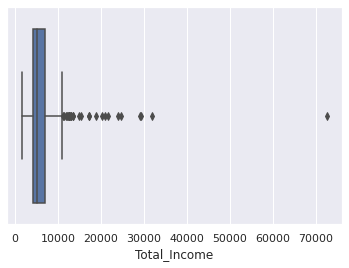

In [227]:
sns.boxplot(test_new['Total_Income'])
plt.show()

In [228]:
data_new[data_new['Total_Income']<=50000].shape

(608, 14)

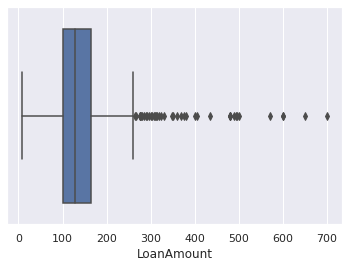

In [229]:
sns.boxplot(data_new['LoanAmount'])
plt.show()

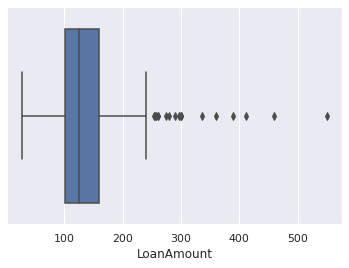

In [230]:
sns.boxplot(test_new['LoanAmount'])
plt.show()

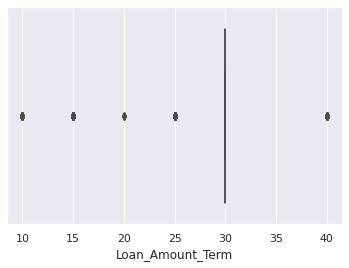

In [231]:
sns.boxplot(data_new['Loan_Amount_Term'])
plt.show()

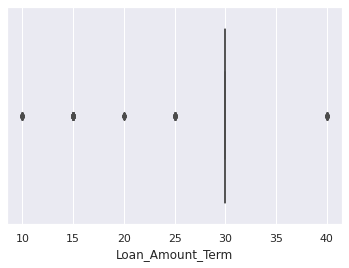

In [232]:
sns.boxplot(test_new['Loan_Amount_Term'])
plt.show()

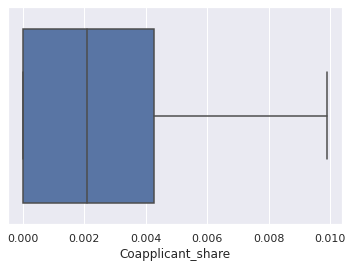

In [233]:
sns.boxplot(data_new['Coapplicant_share'])
plt.show()

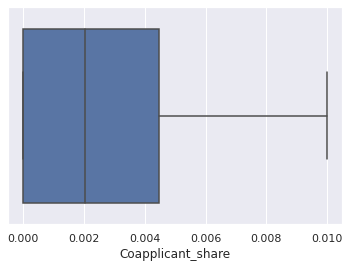

In [234]:
sns.boxplot(test_new['Coapplicant_share'])
plt.show()

In [235]:
data_new.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income         float64
Coapplicant_share    float64
dtype: object

In [236]:
data_new.shape

(611, 14)

In [237]:
test_new.shape

(367, 13)

In [238]:
data_new = data_new[data_new['Total_Income']<=50000] 
#data_new = data_new[data_new['LoanAmount']<=600] 

In [239]:
# Creating the variable of EMI,i.e. 'Equalised Monthly Installments' : 
data_new['EMI'] = (data_new['LoanAmount']*1000)/data_new['Loan_Amount_Term']
data_new['Monthly_savings'] = data_new['Total_Income'] - data_new['EMI']
test_new['EMI'] = (test_new['LoanAmount']*1000)/test_new['Loan_Amount_Term']
test_new['Monthly_savings'] = test_new['Total_Income'] - test_new['EMI'] 

In [240]:
data_new['Monthly_savings'] = round(data_new['Monthly_savings'],2)
test_new['Monthly_savings'] = round(test_new['Monthly_savings'],2)

In [241]:
data_new['Coapplicant_share'] = data_new['Coapplicant_share']*100
test_new['Coapplicant_share'] = test_new['Coapplicant_share']*100

In [242]:
data_new['Monthly_savings%'] = data_new['Monthly_savings']/data_new['Total_Income']
test_new['Monthly_savings%'] = test_new['Monthly_savings']/test_new['Total_Income'] 
data_new['EMI'] = round(data_new['EMI'],2)
test_new['EMI'] = round(test_new['EMI'],2)

In [243]:
data_new['Monthly_savings%'] = round(data_new['Monthly_savings%'],4) 
test_new['Monthly_savings%'] = round(test_new['Monthly_savings%'],4) 

In [244]:
data_new['Coapplicant_share'] = round(data_new['Coapplicant_share'],4) 
test_new['Coapplicant_share'] = round(test_new['Coapplicant_share'],4) 

In [245]:
data_new['ApplicantIncome_savings'] = data_new['ApplicantIncome'] - data_new['EMI']
test_new['ApplicantIncome_savings'] = test_new['ApplicantIncome'] - test_new['EMI'] 

In [246]:
data_new['ApplicantIncome_savings%'] = data_new['ApplicantIncome_savings'] / data_new['ApplicantIncome']
test_new['ApplicantIncome_savings%'] = test_new['ApplicantIncome_savings'] / test_new['ApplicantIncome'] 

In [247]:
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Coapplicant_share,EMI,Monthly_savings,Monthly_savings%,ApplicantIncome_savings,ApplicantIncome_savings%
0,Male,No,0,Graduate,No,5849.0,0.0,137.983483,30.0,1.0,Urban,Y,5849.0,0.0000,4599.45,1249.55,0.2136,1249.55,0.213635
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,30.0,1.0,Rural,N,6091.0,0.2476,4266.67,1824.33,0.2995,316.33,0.069022
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,30.0,1.0,Urban,Y,3000.0,0.0000,2200.00,800.00,0.2667,800.00,0.266667
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,30.0,1.0,Urban,Y,4941.0,0.4772,4000.00,941.00,0.1904,-1417.00,-0.548587
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,30.0,1.0,Urban,Y,6000.0,0.0000,4700.00,1300.00,0.2167,1300.00,0.216667


In [248]:
data_new['ApplicantIncome_savings%'] = round(data_new['ApplicantIncome_savings%'],4) 
test_new['ApplicantIncome_savings%'] = round(test_new['ApplicantIncome_savings%'],4) 

In [249]:
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Coapplicant_share,EMI,Monthly_savings,Monthly_savings%,ApplicantIncome_savings,ApplicantIncome_savings%
0,Male,No,0,Graduate,No,5849.0,0.0,137.983483,30.0,1.0,Urban,Y,5849.0,0.0000,4599.45,1249.55,0.2136,1249.55,0.2136
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,30.0,1.0,Rural,N,6091.0,0.2476,4266.67,1824.33,0.2995,316.33,0.0690
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,30.0,1.0,Urban,Y,3000.0,0.0000,2200.00,800.00,0.2667,800.00,0.2667
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,30.0,1.0,Urban,Y,4941.0,0.4772,4000.00,941.00,0.1904,-1417.00,-0.5486
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,30.0,1.0,Urban,Y,6000.0,0.0000,4700.00,1300.00,0.2167,1300.00,0.2167


In [250]:
data_new['ApplicantIncome_savings_less'] = data_new['ApplicantIncome_savings'].apply(lambda x : 1 if x < 0 else 0)
test_new['ApplicantIncome_savings_less'] = test_new['ApplicantIncome_savings'].apply(lambda x : 1 if x < 0 else 0)

In [251]:
data_new[data_new['Coapplicant_share'] > 0.50]['Loan_Status'].value_counts(normalize=True)

Y    0.638889
N    0.361111
Name: Loan_Status, dtype: float64

In [252]:
data_new['Loan_Status'].value_counts(normalize=True)

Y    0.685855
N    0.314145
Name: Loan_Status, dtype: float64

In [253]:
data_new['Coapplicant_Dependent'] = data_new['Coapplicant_share'].apply(lambda x : 1 if x >= 0.5 else 0)
test_new['Coapplicant_Dependent'] = test_new['Coapplicant_share'].apply(lambda x : 1 if x >= 0.5 else 0)

In [254]:
data_new[data_new['ApplicantIncome_savings_less']==1]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Coapplicant_share,EMI,Monthly_savings,Monthly_savings%,ApplicantIncome_savings,ApplicantIncome_savings%,ApplicantIncome_savings_less,Coapplicant_Dependent
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,30.0,1.0,Urban,Y,4941.0,0.4772,4000.00,941.00,0.1904,-1417.00,-0.5486,1,0
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,30.0,1.0,Urban,Y,9613.0,0.4365,8900.00,713.00,0.0742,-3483.00,-0.6430,1,0
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,30.0,1.0,Urban,Y,3849.0,0.3939,3166.67,682.33,0.1773,-833.67,-0.3573,1,0
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.000000,30.0,0.0,Semiurban,N,5540.0,0.4520,5266.67,273.33,0.0493,-2230.67,-0.7347,1,0
8,Male,Yes,2,Graduate,No,4006.0,1526.0,168.000000,30.0,1.0,Urban,Y,5532.0,0.2758,5600.00,-68.00,-0.0123,-1594.00,-0.3979,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Male,Yes,0,Not Graduate,No,2400.0,3800.0,137.135827,15.0,1.0,Urban,N,6200.0,0.6129,9142.39,-2942.39,-0.4746,-6742.39,-2.8093,1,1
606,Male,Yes,1,Graduate,No,3400.0,2500.0,173.000000,30.0,1.0,Semiurban,Y,5900.0,0.4237,5766.67,133.33,0.0226,-2366.67,-0.6961,1,0
607,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.000000,30.0,1.0,Rural,Y,5398.0,0.2614,5233.33,164.67,0.0305,-1246.33,-0.3126,1,0
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,30.0,1.0,Rural,Y,5182.0,0.3763,3600.00,1582.00,0.3053,-368.00,-0.1139,1,0


In [255]:
data_new = data_new.drop(['ApplicantIncome_savings','ApplicantIncome_savings%','ApplicantIncome','CoapplicantIncome'],axis=1)
test_new = test_new.drop(['ApplicantIncome_savings','ApplicantIncome_savings%','ApplicantIncome','CoapplicantIncome'],axis=1) 

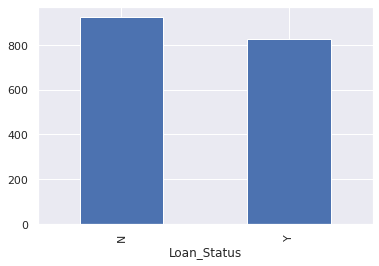

In [256]:
data_new.groupby("Loan_Status")['Monthly_savings'].median().plot.bar()
plt.show()

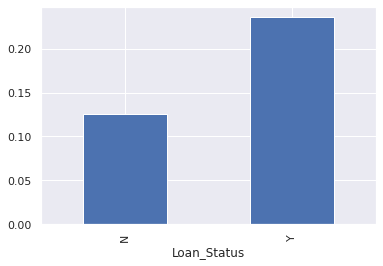

In [257]:
data_new.groupby("Loan_Status")['Coapplicant_share'].median().plot.bar()
plt.show()

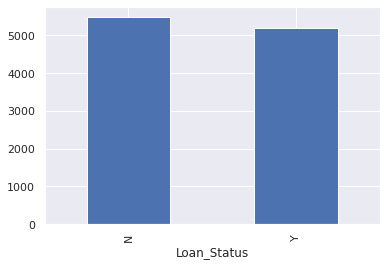

In [258]:
data_new.groupby("Loan_Status")['EMI'].mean().plot.bar()
plt.show()

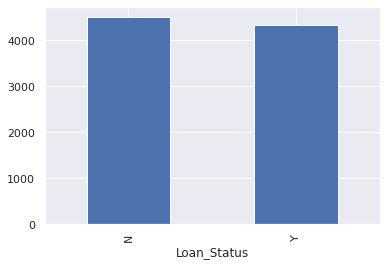

In [259]:
data_new.groupby("Loan_Status")['EMI'].median().plot.bar()
plt.show() 

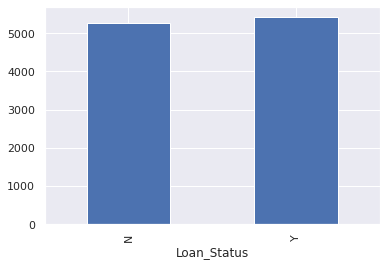

In [260]:
data_new.groupby("Loan_Status")['Total_Income'].median().plot.bar()
plt.show()

In [261]:
data_new['LoanAmount'] = data_new['LoanAmount']*1000
test_new['LoanAmount'] = test_new['LoanAmount']*1000

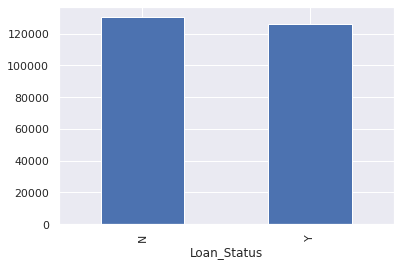

In [262]:
data_new.groupby("Loan_Status")['LoanAmount'].median().plot.bar()
plt.show() 

#### Checking for outliers :

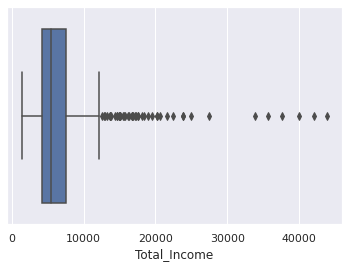

In [263]:
sns.boxplot(data_new['Total_Income'])
plt.show()

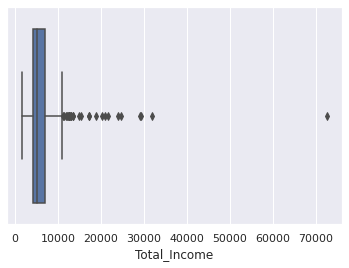

In [264]:
sns.boxplot(test_new['Total_Income'])
plt.show()

In [265]:
data_new['Total_Income'].quantile(0.99)

27324.719999999874

#### Scaling :

In [266]:
scaler = MinMaxScaler()
data_new[['LoanAmount','Loan_Amount_Term','Total_Income','Coapplicant_share','EMI','Monthly_savings','Monthly_savings%']] = scaler.fit_transform(data_new[['LoanAmount','Loan_Amount_Term','Total_Income','Coapplicant_share','EMI','Monthly_savings','Monthly_savings%']])
test_new[['LoanAmount','Loan_Amount_Term','Total_Income','Coapplicant_share','EMI','Monthly_savings','Monthly_savings%']] = scaler.transform(test_new[['LoanAmount','Loan_Amount_Term','Total_Income','Coapplicant_share','EMI','Monthly_savings','Monthly_savings%']])

#### Creating Dummy Variables :

In [267]:
data_new['Loan_Amount_Term'].value_counts()

0.666667    510
0.166667     43
0.500000     26
1.000000     14
0.000000     12
0.333333      3
Name: Loan_Amount_Term, dtype: int64

In [268]:
test_new['Loan_Amount_Term'].value_counts()

0.666667    312
0.166667     22
0.500000     13
1.000000      8
0.000000      8
0.333333      4
Name: Loan_Amount_Term, dtype: int64

In [269]:
'''data_new['Loan_Amount_Term'] = data_new['Loan_Amount_Term'].astype(object)
test_new['Loan_Amount_Term'] = test_new['Loan_Amount_Term'].astype(object)'''

"data_new['Loan_Amount_Term'] = data_new['Loan_Amount_Term'].astype(object)\ntest_new['Loan_Amount_Term'] = test_new['Loan_Amount_Term'].astype(object)"

In [270]:
#data_new = pd.get_dummies(data_new,columns = ['Gender','Married'],drop_first=True)
#test_new = pd.get_dummies(test_new,columns = ['Gender','Married'],drop_first=True)
data_new = pd.get_dummies(data_new,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
test_new = pd.get_dummies(test_new,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [271]:
data_new.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Coapplicant_share,EMI,Monthly_savings,Monthly_savings%,ApplicantIncome_savings_less,Coapplicant_Dependent,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.201222,0.666667,1.0,Y,0.103804,0.000000,0.108298,0.255577,0.839239,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.185647,0.666667,1.0,N,0.109504,0.250076,0.099916,0.266649,0.858902,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0.088924,0.666667,1.0,Y,0.036698,0.000000,0.047859,0.246918,0.851394,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.173167,0.666667,1.0,Y,0.082417,0.481972,0.093199,0.249634,0.833928,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.205928,0.666667,1.0,Y,0.107361,0.000000,0.110831,0.256549,0.839949,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [272]:
data_new['Loan_Status'] = data_new['Loan_Status'].map({'Y':1,'N':0})
y = data_new['Loan_Status']
X = data_new.drop(['Loan_Status'],axis=1)

In [273]:
print(X.shape)
print(test_new.shape)

(608, 25)
(367, 25)


In [274]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

### Modelling :

### 1) RandomForest Classifier-1 :

### Grid-Search Cross Validation :

In [275]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1) 

In [277]:
param_grid = {'class_weight':['balanced','None'],
              'criterion':['entropy','gini'],
              'max_depth' : [8,9,10,11],
              'max_features' : [0.8,0.9,1],
              'max_samples' : [0.6,0.7,0.8]} 
grid_search = GridSearchCV(estimator = rf,param_grid=param_grid,cv = 5,scoring = 'recall', n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [278]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9431478968792402
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'max_samples': 0.6}


In [ ]:
ebetbtby

In [281]:
rf = RandomForestClassifier(class_weight='balanced',criterion='gini',max_depth=10,max_features=0.8,max_samples=0.6)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=0.8,
                       max_leaf_nodes=None, max_samples=0.6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [283]:
y_test_prob = rf.predict_proba(X_test)
y_test = rf.predict(X_test)

In [285]:
accuracy_score(y_test,y_test_pred)

0.9672131147540983

In [286]:
y_test_pred = pd.Series(y_test_pred)
y_test_pred.value_counts(normalize=True)

1    0.795082
0    0.204918
dtype: float64

In [287]:
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

1    0.778689
0    0.221311
dtype: float64

In [288]:
y_train = pd.Series(y_train)
y_train.value_counts(normalize=True)

1    0.685185
0    0.314815
Name: Loan_Status, dtype: float64

### Plotting the feature importances :

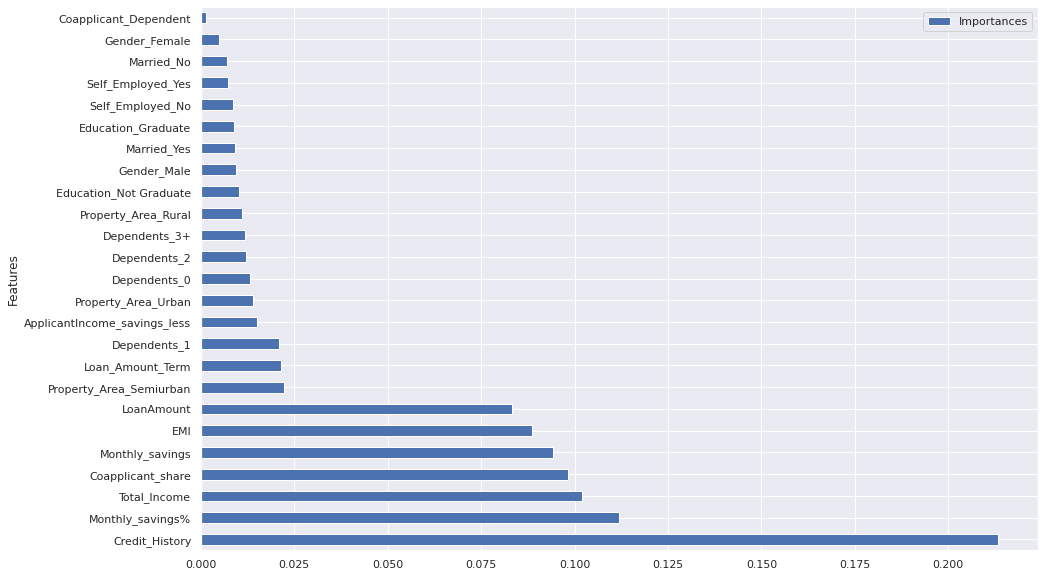

In [289]:
df = pd.DataFrame()
df['Features'] = pd.Series(list(X_train.columns))
df['Importances'] = rf.feature_importances_
df = df.sort_values(by='Importances',ascending=False)
df1 = df.set_index('Features')
sns.set(font_scale=1)
df1.plot(kind='barh',figsize=(15,10))
plt.show() 

#### So based on the above RandomForest model it can be clearly seen that the most important features effecting approval/not-approval are as follows :
- Credit_History
- Total_Income
- Coapplicant_share
- Monthly_savings%
- EMI


In [290]:
# The approval probabilities of all the instances based on RandomForest Model :
y_test_prob = y_test_prob[:,1]
y_test_prob 

array([0.86      , 0.68933606, 0.57742707, 0.77708545, 0.97938127,
       0.68091519, 0.85938127, 0.89748836, 0.61524452, 0.53762821,
       0.70375595, 0.84514544, 0.        , 0.80441364, 0.82219209,
       0.78525797, 0.72231313, 0.61393306, 0.79683364, 0.68295017,
       0.78153919, 0.80527527, 0.1       , 0.56313475, 0.7387807 ,
       0.70127292, 0.05      , 0.96616203, 0.55438941, 0.06      ,
       0.66156453, 0.76649746, 0.79481407, 0.56728727, 0.69439451,
       0.11      , 0.8301744 , 0.53      , 0.77420147, 0.47197717,
       0.94407219, 0.55386726, 0.80629953, 0.91309932, 0.86144952,
       0.08      , 0.53545676, 0.16      , 0.48717618, 0.8101744 ,
       0.6269931 , 0.1       , 0.95938127, 0.88040839, 0.66475253,
       0.17      , 0.33823293, 0.60905664, 0.96143175, 0.91871115,
       0.80118524, 0.66625448, 0.76710815, 0.07      , 0.76333168,
       0.76791609, 0.61664495, 0.94501973, 0.16      , 0.66224258,
       0.86794716, 0.95229387, 0.69779777, 0.78647619, 0.82833

#### Making the submission to leaderboard :

In [ ]:
X['Loan_ID'] = loan_ids_train
X['Loan_ID'] = X['Loan_ID'].str.lstrip('LP00')

In [ ]:
test_new['Loan_ID'] = loan_ids_test
test_new['Loan_ID'] = test_new['Loan_ID'].str.lstrip('LP00')

In [ ]:
X['Loan_ID'] = X['Loan_ID'].astype(int)
test_new['Loan_ID'] = test_new['Loan_ID'].astype(int)

In [ ]:
test_new.head()

In [ ]:
X.head()

In [ ]:
rf = RandomForestClassifier(class_weight='balanced',criterion='entropy',max_depth=10,max_features=1.0,max_samples=0.7,random_state=42)
rf.fit(X,y)
y_pred = rf.predict(test_new)

In [ ]:
y_pred = rf.predict(test_new)

In [ ]:
submissions = pd.DataFrame()
submissions['Loan_ID'] = loan_ids_test
submissions['Loan_Status'] = y_pred

In [ ]:
submissions['Loan_Status'] = submissions['Loan_Status'].map({1:'Y',0:'N'})
submissions.head()

In [ ]:
submissions['Loan_Status'].value_counts(normalize=True)

In [ ]:
submissions.to_csv('submissions-1.csv',index=False,encoding='utf-8')

#### Hence making the above submission, an accuracy of slightly over 80% has been achieved in the final submissions.